In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [2]:
vegi_df = pd.read_csv("G:/Meine Ablage/KI_Projekt/Daten/vegis_all.csv")
vegi_df = vegi_df.drop(columns=["Unnamed: 0", "green pixels"])
vegi_df.head(10)

,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label,Image
0,191,85,141,117,91,0,0.729042,0.574953,40,11.697907,Kartoffel,Kartoffel_1
1,193,80,141,117,91,0,0.751392,0.566709,41,11.196103,Kartoffel,Kartoffel_2
2,194,78,141,117,91,0,0.775938,0.583498,35,12.240883,Kartoffel,Kartoffel_3
3,155,67,136,112,84,0,0.748387,0.649936,40,6.705826,Kartoffel,Kartoffel_4
4,166,68,136,112,84,0,0.694454,0.562511,40,6.861728,Kartoffel,Kartoffel_5
5,168,68,136,112,84,0,0.713323,0.578262,41,7.037449,Kartoffel,Kartoffel_6
6,150,130,136,112,84,0,0.800256,0.674584,49,8.504246,Kartoffel,Kartoffel_7
7,148,126,119,95,72,0,0.811937,0.823492,47,8.894188,Kartoffel,Kartoffel_8
8,147,125,119,95,72,0,0.810803,0.835890,52,8.337561,Kartoffel,Kartoffel_9
9,181,131,115,90,69,0,0.763253,0.756819,34,9.984699,Kartoffel,Kartoffel_10


In [133]:
vegi_df.describe()

,Hight,Width,R,G,B,green pixels,ratio area,circularity
count,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000
mean,186.783913,110.134288,113.753238,88.509202,58.438309,797.755965,0.467672,0.421072
std,64.923150,48.972070,26.711902,23.025116,19.967456,2055.226414,0.308599,0.277029
min,53.000000,22.000000,24.000000,24.000000,8.000000,0.000000,0.000000,0.008207
25%,133.500000,71.000000,96.000000,74.000000,47.000000,0.000000,0.171172,0.156769
50%,188.000000,103.000000,115.000000,87.000000,58.000000,0.000000,0.571470,0.358547
75%,249.000000,136.000000,134.000000,103.000000,69.000000,269.000000,0.749589,0.688988
max,351.000000,255.000000,189.000000,188.000000,191.000000,15125.000000,0.960428,0.898365


In [3]:
vegi_encoded_df = vegi_df.copy()

vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Karotte', 'Label'] = 0
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Kartoffel', 'Label'] = 1
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Zwiebel', 'Label'] = 2
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Karotte_Trieb', 'Label'] = 3
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Kartoffel_Trieb', 'Label'] = 4
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Zwiebel_Trieb', 'Label'] = 5

vegi_encoded_df['Label'] = vegi_encoded_df['Label'].astype('int')
vegi_encoded_df['Label'].value_counts()

Label
3    1632
1    1221
0    1056
2    1003
4     822
5     780
Name: count, dtype: int64

In [5]:
X = vegi_encoded_df.iloc[:, 0:10]
y = vegi_encoded_df.iloc[:, 10:12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Image names are only for assignment from datapoint to corresponding image
image_names = y_train.iloc[:,1]  
image_names_test = y_test.iloc[:,1]

y_train_clean = y_train.drop(columns="Image")
y_test_clean = y_test.drop(columns="Image")


In [6]:
print(X_train.head())
print(X_test.head())
print(y_train_clean.head())
print(y_test_clean.head())
print(image_names.head())

      Hight  Width    R    G   B  green onion pixels  ratio area  circularity  \
6211    207    129  149  127  73                  33    0.722765     0.726994   
2476    123     55  119   75  63                   0    0.668662     0.511018   
5223    269    111  100   89  57                2515    0.364363     0.156674   
3832    255    173  109   99  62                6991    0.001791     0.517762   
5774    100     80  128   99  66                   0    0.780813     0.781659   

      keypoints  mean keypoints  
6211         48        5.562044  
2476         24        5.131930  
5223         53        6.428029  
3832        242        4.243097  
5774         19       12.654041  
      Hight  Width    R    G   B  green onion pixels  ratio area  circularity  \
5932    119     73  104   72  33                   0    0.785139     0.615918   
1872    187     31  111   64  40                   0    0.696653     0.267553   
1002     85     62   45   30  17                   0    0.773340  

In [7]:
# Scaler
X_train_copy = X_train.copy()

col_names = ['Hight', 'Width', 'R', 'G', 'B', 'green onion pixels', 'ratio area', 'circularity', 'keypoints', 'mean keypoints']
features = X_train_copy[col_names]

ct = ColumnTransformer([
        ('standard1', StandardScaler(), ['Hight', 'Width', 'R', 'G', 'B', 'green onion pixels'])
    ], remainder='passthrough')

X_train_scaled = ct.fit_transform(features)

# Scale Testdata
col_names = ['Hight', 'Width', 'R', 'G', 'B', 'green onion pixels', 'ratio area', 'circularity', 'keypoints', 'mean keypoints']
features_test = X_test[col_names]
X_test_scaled = ct.transform(features_test)

In [42]:
y_train_clean_2 = y_train_clean.to_numpy()

clf = LogisticRegression(penalty=None, solver='lbfgs', tol=0.001, max_iter=20000, multi_class='multinomial')
clf.fit(X_train_scaled, y_train_clean_2)

c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=20000, multi_class='multinomial', penalty=None,
                   tol=0.001)

In [43]:
print(clf.classes_)
print(clf.coef_[:10])

[0 1 2 3 4 5]
[[ 1.69136317e+00 -1.69292094e+00  3.58254806e+00 -4.84416233e+00
   1.69544458e+00  7.50222677e+01  1.84372125e+00 -1.34400787e+00
  -4.27933807e-02  3.74771355e-02]
 [-3.53555913e-01  8.53360788e-01 -1.13422982e+01  1.49420253e+01
  -5.18299636e+00 -1.86899598e+02  2.62815980e+00  1.03427331e+01
   4.26728754e-03  1.83500425e-01]
 [-1.29480071e+00  1.51899864e+00  5.76515240e+00 -8.51317850e+00
   3.95574855e+00 -5.14244945e+00 -2.27249811e-01  2.07303296e+00
  -3.21218106e-02  3.58407604e-02]
 [ 8.89498265e-01 -2.57023753e+00  3.08918047e+00 -4.03634155e+00
   1.60436951e+00  7.90375836e+01 -4.95899467e+00 -1.45776350e+01
   4.88967935e-02 -4.47065580e-01]
 [-1.85930520e+00  2.08489441e+00 -3.54615791e+00  7.23776652e+00
  -3.58402328e+00 -3.97753799e+01  2.01317462e+00  3.83148276e+00
   1.85834028e-02  1.21283679e-01]
 [ 9.26800388e-01 -1.94095372e-01  2.45157519e+00 -4.78610941e+00
   1.51145700e+00  7.77575759e+01 -1.29881120e+00 -3.25605962e-01
   3.16770736e-03  

In [44]:
pred_vegi = clf.predict(X_train_scaled[200].reshape(1, -1))
print(f"Predicted: {pred_vegi}. Groundtruth: {y_train_clean_2[200]}")

Predicted: [2]. Groundtruth: [2]


In [45]:
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

In [46]:
accuracy_testdata = accuracy_score(y_test_clean, y_test_pred)
accuracy_traindata = accuracy_score(y_train_clean_2, y_train_pred)
print(f"Accuracy Test: {accuracy_testdata}\nAccuracy Train: {accuracy_traindata}")

number_correct_testdata = accuracy_score(y_test_clean, y_test_pred, normalize=False)
number_correct_traindata = accuracy_score(y_train_clean_2, y_train_pred, normalize=False)
print(f"Number Correct Predicions Test: {number_correct_testdata}\nNumber Correct Predicions Train: {number_correct_traindata}")

Accuracy Test: 0.8385512584407612
Accuracy Train: 0.84503582395087
Number Correct Predicions Test: 1366
Number Correct Predicions Train: 4128


Vegis
[[200   7  21   4   5  30]
 [ 11 282  10   0  31   0]
 [  5   8 220   1   9   2]
 [ 17   0   1 361   0  13]
 [  1  30   0   1 160   1]
 [ 14   3   9  22   7 143]]


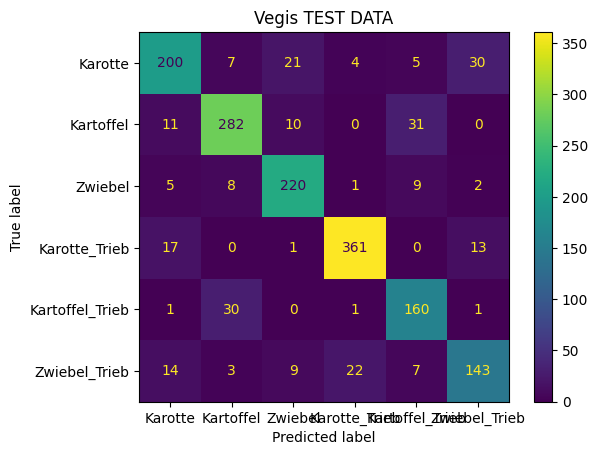

In [47]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test_scaled,
    y_test_clean,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Karotte_Trieb', 'Kartoffel_Trieb', 'Zwiebel_Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TEST DATA")

print("Vegis")
print(disp.confusion_matrix)

In [ ]:
[[147  14  30   3   6  17]
 [ 12 152  12   0  34   0]
 [ 21  13 164   0   5   2]
 [ 13   0   0 169   0  14]
 [  4  37   3   0  95   0]
 [ 27   3  10  32   2  59]]

Vegis TRAIN
[[ 601   18   79    6   17   68]
 [  27  746   19    0   92    3]
 [  40    8  678    4   17   11]
 [  50    0    0 1148    0   42]
 [   2  100    3    5  514    5]
 [  35    3   26   59   18  441]]


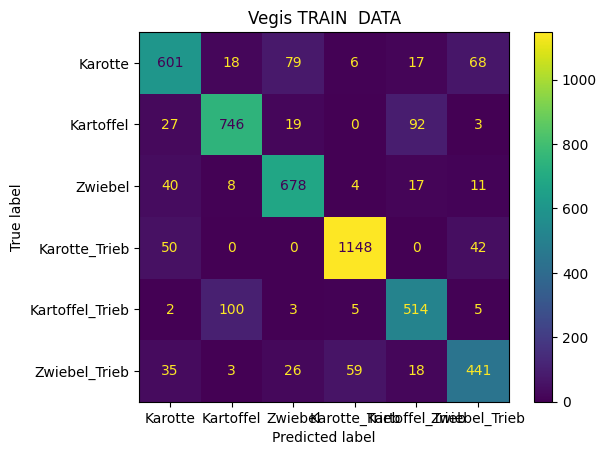

In [48]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_train_scaled,
    y_train_clean,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Karotte_Trieb', 'Kartoffel_Trieb', 'Zwiebel_Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TRAIN  DATA")

print("Vegis TRAIN")
print(disp.confusion_matrix)